# Set up plotting in the notebook

In [2]:
%matplotlib inline

In [3]:
# %matplotlib

# Imports

In [4]:
from __future__ import division

In [5]:
from bokeh.charts import Scatter, output_file, show
from bokeh.sampledata.autompg import autompg as df
from bokeh.models import HoverTool
from bokeh.models import GlyphRenderer
from bokeh.io import output_notebook

In [6]:
# output_notebook()

In [7]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize, scale

from sklearn.feature_selection import SelectKBest

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
sns.set_context("poster")

# Load data

In [11]:
data = pd.read_excel("/home/gus/MEGAsync/zim/main/BCH/Projects/Naresh/RNAseq/genes_log3WH.xlsx")

In [12]:
data.head()

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,1WH1_FPKM,1WK1_FPKM,3WH1_FPKM,3WK1_FPKM,12WH2_FPKM,12WK2_FPKM,log1WH,log1WK,log3WH,log3WK,log12WH,log12WK
0,ENSMUSG00000028167,-,-,ENSMUSG00000028167,Bdh2,-,chr3:135281220-135304426,-,-,0.000056,0.065465,0.205478,0.077530,0.342887,0.237588,-11.851611,-1.650177,0,-1.406152,0.738749,0.209478
1,ENSMUSG00000052414,-,-,ENSMUSG00000052414,Gm28047,-,chr15:102523838-102625464,-,-,0.000503,0.000264,0.676173,0.319848,0.000443,0.000000,-10.392320,-11.320051,0,-1.080006,-10.576838,NaN
2,ENSMUSG00000076128,-,-,ENSMUSG00000076128,Mir686,-,chr14:54614119-54617995,-,-,0.104032,10.493700,82.695900,0.000000,23.360600,0.438910,-9.634645,-2.978292,0,NaN,-1.823738,-7.557747
3,ENSMUSG00000091071,-,-,ENSMUSG00000091071,1700030C10Rik,-,chr12:20804380-20815779,-,-,0.021897,0.049984,10.595400,0.037717,0.009808,0.000000,-8.918483,-7.727768,0,-8.134019,-10.077155,NaN
4,ENSMUSG00000042251,-,-,ENSMUSG00000042251,Pm20d1,-,chr1:131797380-131821473,-,-,0.033215,0.183693,5.645610,0.321783,0.239373,0.058433,-7.409172,-4.941761,0,-4.132969,-4.559797,-6.594212


In [13]:
data_ = data[["gene_id","1WH1_FPKM","1WK1_FPKM","3WH1_FPKM","3WK1_FPKM","12WH2_FPKM","12WK2_FPKM",]]

# Transpose the data so we are PCA'ing the conditions

In [14]:
data_.head()

,gene_id,1WH1_FPKM,1WK1_FPKM,3WH1_FPKM,3WK1_FPKM,12WH2_FPKM,12WK2_FPKM
0,ENSMUSG00000028167,0.000056,0.065465,0.205478,0.077530,0.342887,0.237588
1,ENSMUSG00000052414,0.000503,0.000264,0.676173,0.319848,0.000443,0.000000
2,ENSMUSG00000076128,0.104032,10.493700,82.695900,0.000000,23.360600,0.438910
3,ENSMUSG00000091071,0.021897,0.049984,10.595400,0.037717,0.009808,0.000000
4,ENSMUSG00000042251,0.033215,0.183693,5.645610,0.321783,0.239373,0.058433


In [15]:
dataT_ = data_.T.drop('gene_id',axis=0)

In [16]:
dataT_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,18728,18729,18730,18731,18732,18733,18734,18735,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745,18746,18747,18748,18749,18750,18751,18752,18753,18754,18755,18756,18757,18758,18759,18760,18761,18762,18763,18764,18765,18766,18767,18768,18769,18770,18771,18772,18773,18774,18775,18776,18777,18778,18779,18780,18781,18782,18783,18784,18785,18786,18787,18788,18789,18790,18791,18792,18793,18794,18795,18796,18797,18798,18799,18800,18801,18802,18803,18804,18805,18806,18807,18808,18809,18810,18811,18812,18813,18814,18815,18816,18817,18818,18819,18820,18821,18822,18823,18824,18825,18826,18827,18828,18829,18830,18831,18832,18833,18834,18835,18836,18837,18838,18839,18840,18841,18842,18843,18844,18845,18846,18847,18848,18849,18850,18851,18852,18853,18854,18855,18856,18857,18858,18859,18860,18861,18862,18863,18864,18865,18866,18867,18868,18869,18870,18871,18872,18873,18874,18875,18876,18877,18878,18879,18880,18881,18882,18883,18884,18885,18886,18887,18888,18889,18890,18891,18892,18893,18894,18895,18896,18897,18898,18899,18900,18901,18902,18903,18904,18905,18906,18907,18908,18909,18910,18911,18912,18913,18914,18915,18916,18917,18918,18919,18920,18921,18922,18923,18924,18925,18926,18927,18928,18929,18930,18931,18932,18933,18934,18935,18936,18937,18938,18939,18940,18941,18942,18943,18944,18945,18946,18947,18948,18949,18950,18951,18952,18953,18954,18955,18956,18957,18958,18959,18960,18961,18962,18963,18964,18965,18966,18967,18968,18969,18970,18971,18972,18973,18974,18975,18976,18977,18978,18979,18980,18981,18982,18983,18984,18985,18986,18987,18988,18989,18990,18991,18992,18993,18994,18995,18996,18997,18998,18999,19000,19001,19002,19003,19004,19005,19006,19007,19008,19009,19010,19011,19012,19013,19014,19015,19016,19017,19018,19019,19020,19021,19022,19023,19024,19025,19026,19027,19028,19029,19030,19031,19032,19033,19034,19035,19036,19037,19038,19039,19040,19041,19042,19043,19044,19045,19046,19047,19048,19049,19050,19051,19052,19053,19054,19055,19056,19057,19058,19059,19060,19061,19062,19063,19064,19065,19066,19067,19068,19069,19070,19071,19072,19073,19074,19075,19076,19077,19078,190

# Make map from gene_short_name to gene_id

In [17]:
to_gene_id = {}

for i in range(len(data)):
    to_gene_id[data.iloc[i,4]] = data.iloc[i,3]

In [18]:
to_gene_id['Stat1']

u'ENSMUSG00000026104'

## Looks like we have duplicated values for gene_short_name

In [19]:
len(data.gene_short_name.unique())

19201

In [20]:
len(data)

19227

In [21]:
dup_short_name = data[data.gene_short_name.duplicated(keep=False)].copy()

In [22]:
dup_short_name['gene_short_name'] = dup_short_name.gene_short_name.astype(str)

In [23]:
dup_short_name = dup_short_name.sort_values('gene_short_name')

In [24]:
len(dup_short_name)

52

In [25]:
dup_short_name

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,1WH1_FPKM,1WK1_FPKM,3WH1_FPKM,3WK1_FPKM,12WH2_FPKM,12WK2_FPKM,log1WH,log1WK,log3WH,log3WK,log12WH,log12WK
15754,ENSMUSG00000026621,-,-,ENSMUSG00000026621,2015-03-01 00:00:00,-,chr1:184786766-184811313,-,-,0.133994,0.000000,0.064426,0.046154,0.000000,0.000000,1.056451,NaN,0,-0.481177,NaN,NaN
11338,ENSMUSG00000036469,-,-,ENSMUSG00000036469,2015-03-01 00:00:00,-,chr8:65617899-66471637,-,-,42.901300,27.153000,36.340700,28.876500,22.855500,24.715600,0.239435,-0.420475,0,-0.331690,-0.669045,-0.556164
8976,ENSMUSG00000073481,-,-,ENSMUSG00000073481,2015-03-02 00:00:00,-,chr1:184813067-184846451,-,-,120.029000,111.285000,115.938000,116.172000,114.237000,112.749000,0.050030,-0.059094,0,0.002909,-0.021324,-0.040239
7150,ENSMUSG00000079557,-,-,ENSMUSG00000079557,2015-03-02 00:00:00,-,chr17:33646232-33718670,-,-,34.432900,34.865100,37.194100,38.910300,30.317800,42.496400,-0.111286,-0.093290,0,0.065078,-0.294909,0.192267
19127,ENSMUSG00000097058,-,-,ENSMUSG00000097058,4930556M19Rik,-,chr15:10714835-10790123,-,-,0.012269,0.000000,0.000000,0.000000,0.032983,0.014390,NaN,NaN,NaN,NaN,NaN,NaN
5600,ENSMUSG00000096971,-,-,ENSMUSG00000096971,4930556M19Rik,-,chr15:10714835-10790123,-,-,0.014532,0.031699,0.017468,0.006257,0.013022,0.008522,-0.265480,0.859773,0,-1.481169,-0.423744,-1.035479
1237,ENSMUSG00000022362,-,-,ENSMUSG00000022362,9130401M01Rik,-,chr15:58022258-58076541,-,-,2.764670,3.021740,9.587770,6.215810,5.545590,5.216790,-1.794088,-1.665816,0,-0.625253,-0.789854,-0.878033
3246,ENSMUSG00000101892,-,-,ENSMUSG00000101892,9130401M01Rik,-,chr15:58022258-58076541,-,-,8.463730,10.832900,14.338500,16.670300,13.082300,20.085700,-0.760529,-0.404475,0,0.217386,-0.132278,0.486275
13387,ENSMUSG00000000562,-,-,ENSMUSG00000000562,Adora3,-,chr3:105870857-105924036,-,-,10.669200,8.244860,7.889420,5.529570,4.719830,2.137380,0.435461,0.063576,0,-0.512752,-0.741184,-1.884076
3557,ENSMUSG00000074344,-,-,ENSMUSG00000074344,Adora3,-,chr3:105870857-105924036,-,-,0.238795,0.289392,0.382718,0.068545,0.035664,0.000000,-0.680509,-0.403257,0,-2.481167,-3.423741,NaN


# Get correlations

In [26]:
data_T = data_.set_index('gene_id').T

In [27]:
data_T.head()

gene_id,ENSMUSG00000028167,ENSMUSG00000052414,ENSMUSG00000076128,ENSMUSG00000091071,ENSMUSG00000042251,ENSMUSG00000069515,ENSMUSG00000022818,ENSMUSG00000040026,ENSMUSG00000020017,ENSMUSG00000028699,ENSMUSG00000027556,ENSMUSG00000023247,ENSMUSG00000061100,ENSMUSG00000003051,ENSMUSG00000018569,ENSMUSG00000028364,ENSMUSG00000040612,ENSMUSG00000021614,ENSMUSG00000026969,ENSMUSG00000020427,ENSMUSG00000012428,ENSMUSG00000009185,ENSMUSG00000098974,ENSMUSG00000067149,ENSMUSG00000031089,ENSMUSG00000023043,ENSMUSG00000069601,ENSMUSG00000026042,ENSMUSG00000030787,ENSMUSG00000067879,ENSMUSG00000027876,ENSMUSG00000046804,ENSMUSG00000022824,ENSMUSG00000038060,ENSMUSG00000015647,ENSMUSG00000018924,ENSMUSG00000036377,ENSMUSG00000079033,ENSMUSG00000043496,ENSMUSG00000024039,ENSMUSG00000026417,ENSMUSG00000095079,ENSMUSG00000079465,ENSMUSG00000023046,ENSMUSG00000049382,ENSMUSG00000001119,ENSMUSG00000022103,ENSMUSG00000021749,ENSMUSG00000021187,ENSMUSG00000026062,ENSMUSG00000027068,ENSMUSG00000019987,ENSMUSG00000056481,ENSMUSG00000036019,ENSMUSG00000025150,ENSMUSG00000035852,ENSMUSG00000000359,ENSMUSG00000026941,ENSMUSG00000047517,ENSMUSG00000024730,ENSMUSG00000009545,ENSMUSG00000072596,ENSMUSG00000025515,ENSMUSG00000023224,ENSMUSG00000029675,ENSMUSG00000090996,ENSMUSG00000063903,ENSMUSG00000070473,ENSMUSG00000013643,ENSMUSG00000091393,ENSMUSG00000035285,ENSMUSG00000026567,ENSMUSG00000035357,ENSMUSG00000028780,ENSMUSG00000027870,ENSMUSG00000044349,ENSMUSG00000026870,ENSMUSG00000032268,ENSMUSG00000031853,ENSMUSG00000044674,ENSMUSG00000035279,ENSMUSG00000014846,ENSMUSG00000019929,ENSMUSG00000076613,ENSMUSG00000017446,ENSMUSG00000037390,ENSMUSG00000030935,ENSMUSG00000001225,ENSMUSG00000055799,ENSMUSG00000021838,ENSMUSG00000034112,ENSMUSG00000055044,ENSMUSG00000058624,ENSMUSG00000028488,ENSMUSG00000022696,ENSMUSG00000001506,ENSMUSG00000049350,ENSMUSG00000042284,ENSMUSG00000029151,ENSMUSG00000028701,ENSMUSG00000029661,ENSMUSG00000029309,ENSMUSG00000053338,ENSMUSG00000020241,ENSMUSG00000051832,ENSMUSG00000031375,ENSMUSG00000045551,ENSMUSG00000020581,ENSMUSG00000092572,ENSMUSG00000024029,ENSMUSG00000089901,ENSMUSG00000026837,ENSMUSG00000034810,ENSMUSG00000074445,ENSMUSG00000020695,ENSMUSG00000056427,ENSMUSG00000022440,ENSMUSG00000030623,ENSMUSG00000098387,ENSMUSG00000048126,ENSMUSG00000028434,ENSMUSG00000050931,ENSMUSG00000034028,ENSMUSG00000043448,ENSMUSG00000026220,ENSMUSG00000076612,ENSMUSG00000039676,ENSMUSG00000092178,ENSMUSG00000034845,ENSMUSG00000036411,ENSMUSG00000030218,ENSMUSG00000038370,ENSMUSG00000024619,ENSMUSG00000087077,ENSMUSG00000097579,ENSMUSG00000079168,ENSMUSG00000074647,ENSMUSG00000020614,ENSMUSG00000008845,ENSMUSG00000055748,ENSMUSG00000032725,ENSMUSG00000015437,ENSMUSG00000049709,ENSMUSG00000022096,ENSMUSG00000037379,ENSMUSG00000034528,ENSMUSG00000026043,ENSMUSG00000020902,ENSMUSG00000031803,ENSMUSG00000101211,ENSMUSG00000039109,ENSMUSG00000055632,ENSMUSG00000061751,ENSMUSG00000070436,ENSMUSG00000025420,ENSMUSG00000020758,ENSMUSG00000102474,ENSMUSG00000097645,ENSMUSG00000023943,ENSMUSG00000048387,ENSMUSG00000035873,ENSMUSG00000045238,ENSMUSG00000018927,ENSMUSG00000015957,ENSMUSG00000035403,ENSMUSG00000034591,ENSMUSG00000047592,ENSMUSG00000047878,ENSMUSG00000029086,ENSMUSG00000072812,ENSMUSG00000035934,ENSMUSG00000028019,ENSMUSG00000027954,ENSMUSG00000020154,ENSMUSG00000021091,ENSMUSG00000083677,ENSMUSG00000031443,ENSMUSG00000006369,ENSMUSG00000032514,ENSMUSG00000050953,ENSMUSG00000026938,ENSMUSG00000074923,ENSMUSG00000008153,ENSMUSG00000104088,ENSMUSG00000044860,ENSMUSG00000028583,ENSMUSG00000039809,ENSMUSG00000031722,ENSMUSG00000032226,ENSMUSG00000102189,ENSMUSG00000085563,ENSMUSG00000082277,ENSMUSG00000087067,ENSMUSG00000072066,ENSMUSG00000024883,ENSMUSG00000046589,ENSMUSG00000029093,ENSMUSG00000097357,ENSMUSG00000027220,ENSMUSG00000089679,ENSMUSG00000038203,ENSMUSG00000019278,ENSMUSG00000024206,ENSMUSG00000085084,ENSMUSG00000002980,ENSMUSG00000028415,ENSMUSG00000089942,ENSMUSG00000054161,ENSMUSG00000061186,ENSMUSG00000001663,EN

In [28]:
r = data_T.corr()

In [29]:
len(r)

19227

In [30]:
r.iloc[:6,:6]

gene_id,ENSMUSG00000028167,ENSMUSG00000052414,ENSMUSG00000076128,ENSMUSG00000091071,ENSMUSG00000042251,ENSMUSG00000069515
gene_id,,,,,,
ENSMUSG00000028167,1.000000,0.052647,0.369220,0.190137,0.200950,0.670404
ENSMUSG00000052414,0.052647,1.000000,0.805189,0.890975,0.904918,0.440200
ENSMUSG00000076128,0.369220,0.805189,1.000000,0.958799,0.962734,0.437268
ENSMUSG00000091071,0.190137,0.890975,0.958799,1.000000,0.998902,0.294020
ENSMUSG00000042251,0.200950,0.904918,0.962734,0.998902,1.000000,0.329003
ENSMUSG00000069515,0.670404,0.440200,0.437268,0.294020,0.329003,1.000000


In [31]:
stat1 = to_gene_id['Stat1']

In [32]:
stat1_list = r[stat1]

In [33]:
stat1_list = stat1_list.sort_values(ascending=False)

In [34]:
stat1_list.head()

gene_id
ENSMUSG00000026104    1.000000
ENSMUSG00000028270    0.999864
ENSMUSG00000039934    0.999507
ENSMUSG00000097840    0.999149
ENSMUSG00000028859    0.998854
Name: ENSMUSG00000026104, dtype: float64

In [35]:
stat1_list.tail()

gene_id
ENSMUSG00000029810   -0.984457
ENSMUSG00000020864   -0.984625
ENSMUSG00000036887   -0.987675
ENSMUSG00000056919   -0.990502
ENSMUSG00000020877   -0.994570
Name: ENSMUSG00000026104, dtype: float64

In [36]:
stat1_list_r2_95 = stat1_list[(stat1_list**2) >= 0.95]

In [37]:
stat1_list_r2_95.shape

(463,)

In [38]:
stat1_list.shape

(19227,)

In [39]:
stat1_list_r2_95_df = data_T[stat1_list_r2_95.index.values.astype(str)]
stat1_list_r2_95_df.head()

gene_id,ENSMUSG00000026104,ENSMUSG00000028270,ENSMUSG00000039934,ENSMUSG00000097840,ENSMUSG00000028859,ENSMUSG00000039699,ENSMUSG00000024798,ENSMUSG00000075010,ENSMUSG00000026893,ENSMUSG00000009863,ENSMUSG00000025324,ENSMUSG00000047798,ENSMUSG00000090231,ENSMUSG00000020572,ENSMUSG00000043953,ENSMUSG00000025591,ENSMUSG00000031897,ENSMUSG00000097474,ENSMUSG00000049401,ENSMUSG00000029063,ENSMUSG00000041754,ENSMUSG00000021109,ENSMUSG00000032301,ENSMUSG00000096727,ENSMUSG00000024953,ENSMUSG00000000204,ENSMUSG00000031637,ENSMUSG00000051682,ENSMUSG00000056116,ENSMUSG00000046879,ENSMUSG00000039062,ENSMUSG00000027639,ENSMUSG00000003283,ENSMUSG00000084012,ENSMUSG00000022584,ENSMUSG00000029345,ENSMUSG00000045094,ENSMUSG00000063524,ENSMUSG00000030340,ENSMUSG00000035232,ENSMUSG00000006699,ENSMUSG00000030017,ENSMUSG00000087700,ENSMUSG00000063229,ENSMUSG00000030188,ENSMUSG00000012296,ENSMUSG00000049109,ENSMUSG00000046245,ENSMUSG00000021360,ENSMUSG00000060550,ENSMUSG00000024338,ENSMUSG00000052270,ENSMUSG00000029840,ENSMUSG00000027514,ENSMUSG00000022564,ENSMUSG00000014602,ENSMUSG00000024590,ENSMUSG00000041168,ENSMUSG00000024308,ENSMUSG00000046031,ENSMUSG00000024164,ENSMUSG00000011752,ENSMUSG00000022586,ENSMUSG00000037321,ENSMUSG00000037993,ENSMUSG00000029007,ENSMUSG00000020057,ENSMUSG00000006850,ENSMUSG00000032202,ENSMUSG00000062070,ENSMUSG00000015474,ENSMUSG00000066150,ENSMUSG00000029417,ENSMUSG00000022126,ENSMUSG00000076441,ENSMUSG00000064246,ENSMUSG00000048787,ENSMUSG00000027035,ENSMUSG00000078853,ENSMUSG00000002413,ENSMUSG00000022555,ENSMUSG00000003039,ENSMUSG00000093800,ENSMUSG00000078922,ENSMUSG00000007458,ENSMUSG00000026826,ENSMUSG00000029534,ENSMUSG00000023010,ENSMUSG00000051397,ENSMUSG00000036636,ENSMUSG00000084780,ENSMUSG00000026005,ENSMUSG00000026271,ENSMUSG00000032841,ENSMUSG00000060445,ENSMUSG00000026946,ENSMUSG00000001156,ENSMUSG00000098134,ENSMUSG00000032915,ENSMUSG00000029322,ENSMUSG00000051314,ENSMUSG00000073226,ENSMUSG00000032496,ENSMUSG00000023951,ENSMUSG00000031781,ENSMUSG00000096768,ENSMUSG00000059040,ENSMUSG00000024805,ENSMUSG00000024019,ENSMUSG00000032661,ENSMUSG00000027776,ENSMUSG00000022216,ENSMUSG00000018541,ENSMUSG00000026074,ENSMUSG00000042262,ENSMUSG00000019970,ENSMUSG00000032487,ENSMUSG00000041324,ENSMUSG00000060183,ENSMUSG00000048521,ENSMUSG00000026070,ENSMUSG00000020277,ENSMUSG00000031444,ENSMUSG00000034480,ENSMUSG00000097020,ENSMUSG00000021069,ENSMUSG00000042265,ENSMUSG00000030521,ENSMUSG00000024525,ENSMUSG00000031987,ENSMUSG00000030695,ENSMUSG00000030203,ENSMUSG00000058392,ENSMUSG00000020069,ENSMUSG00000097028,ENSMUSG00000055994,ENSMUSG00000032294,ENSMUSG00000005763,ENSMUSG00000085498,ENSMUSG00000021486,ENSMUSG00000041481,ENSMUSG00000067297,ENSMUSG00000034394,ENSMUSG00000022479,ENSMUSG00000026701,ENSMUSG00000036093,ENSMUSG00000076490,ENSMUSG00000078920,ENSMUSG00000037697,ENSMUSG00000030745,ENSMUSG00000045211,ENSMUSG00000070034,ENSMUSG00000025929,ENSMUSG00000092550,ENSMUSG00000021125,ENSMUSG00000019528,ENSMUSG00000103138,ENSMUSG00000023456,ENSMUSG00000041278,ENSMUSG00000027360,ENSMUSG00000036427,ENSMUSG00000086693,ENSMUSG00000005672,ENSMUSG00000039813,ENSMUSG00000079197,ENSMUSG00000043432,ENSMUSG00000097660,ENSMUSG00000021831,ENSMUSG00000029075,ENSMUSG00000012889,ENSMUSG00000087231,ENSMUSG00000064147,ENSMUSG00000024143,ENSMUSG00000021196,ENSMUSG00000058587,ENSMUSG00000016257,ENSMUSG00000031904,ENSMUSG00000021998,ENSMUSG00000027164,ENSMUSG00000037820,ENSMUSG00000063268,ENSMUSG00000067613,ENSMUSG00000038151,ENSMUSG00000006818,ENSMUSG00000005683,ENSMUSG00000000171,ENSMUSG00000090246,ENSMUSG00000027737,ENSMUSG00000028792,ENSMUSG00000023800,ENSMUSG00000007589,ENSMUSG00000078783,ENSMUSG00000050912,ENSMUSG00000020736,ENSMUSG00000023206,ENSMUSG00000013974,ENSMUSG00000055676,ENSMUSG00000017801,ENSMUSG00000025491,ENSMUSG00000079057,ENSMUSG00000045827,ENSMUSG00000044461,ENSMUSG00000024349,ENSMUSG00000046415,ENSMUSG00000021124,ENSMUSG00000028645,ENSMUSG00000069236,ENSMUSG00000025059,ENSMUSG00000044103,ENSMUSG00000004612,EN

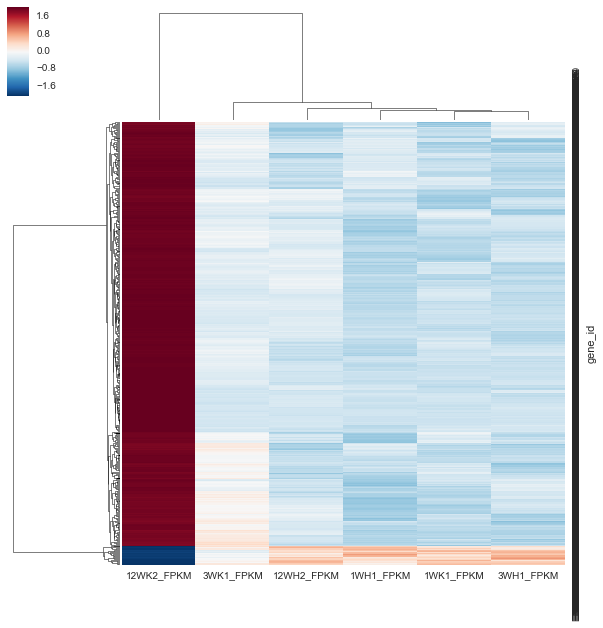

In [41]:
m = 3
sns.set(rc={'figure.figsize': [3*m,6*m]})
sns.clustermap(stat1_list_r2_95_df.T, 
               pivot_kws=None, 
               method='average', metric='euclidean', 
               z_score=0, standard_scale=None, 
               figsize=None, 
               cbar_kws=None, 
               row_cluster=True, col_cluster=True, 
               row_linkage=None, col_linkage=None, 
               row_colors=None, col_colors=None, mask=None
              );